# Image classification using Deep Learning

In [15]:
import os
os.chdir('W:/Documents/GitHub/planktonPipeline')

from keras_utils import plot_losses, img_cnn
from sklearn.metrics import classification_report
from extract_imgs.get_imgs import get_imgs_data
import random
import numpy as np

from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix


listmodes_path = "W:/Bureau/these/donnees_oceano/Newprocess_20190729_FLR25"
imgs_dirs_path = "C:/Users/RFuchs/Telechargement"

## Fetching the images into RAM

In [4]:
X, y, pid_list, le = get_imgs_data(listmodes_path, imgs_dirs_path)
cluster_classes = le.classes_
pid_list = np.array(pid_list)

FUMSECK-FLR25 2019-04-30 12h18_Default (all)_Images
FUMSECK-FLR25 2019-04-30 16h46_Default (all)_Images
FUMSECK-FLR25 2019-05-02 06h19_Default (all)_Images
FUMSECK-FLR25 2019-05-05 23h59_Default (all)_Images
FUMSECK-FLR25 2019-05-07 03h39_Default (all)_Images
FUMSECK-FLR25 2019-05-07 05h39_Default (all)_Images
['noise', 'cryptophytes', 'microphytoplancton']


Images are avalaible only for 3 classes...

And there are very few of them

## Rebalance the dataset and delete the airbubbles (because there are only 4 of them)

In [7]:
airbubbles_indices= np.array([np.argmax(x) for x in y]) == 1
X, y, pid_list = X[airbubbles_indices != True], y[airbubbles_indices != True], pid_list[airbubbles_indices != True]

rus = RandomUnderSampler()
indices = np.reshape(range(len(X)), (-1,1))
indices_resampled, y_resampled = rus.fit_sample(indices, y)
X_resampled, y_resampled, pid_resampled = X[indices_resampled,:][:, 0, : , :], y[indices_resampled][:, 0, :], pid_list[indices_resampled][:, 0] # Dirty indexing...

## Splitting the data between training and validation sets

In [8]:
train_size = int(len(y_resampled) * (2/3))
indices = random.sample(range(len(y_resampled)), train_size)
X_train, X_valid = X_resampled[indices], X_resampled[list(set(range(len(y_resampled))) - set(indices))] 
y_train, y_valid = y_resampled[indices], y_resampled[list(set(range(len(y_resampled))) - set(indices))]
pid_list_train, pid_list_valid = pid_resampled[indices], pid_resampled[list(set(range(len(y_resampled))) - set(indices))]

## Training a CNN

In [9]:
model = img_cnn(X_resampled, y_resampled)

batch_size = 32
STEP_SIZE_TRAIN = (len(X_train) // batch_size) + 1 
STEP_SIZE_VALID = (len(X_valid) // batch_size) + 1 

history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), steps_per_epoch = STEP_SIZE_TRAIN, epochs = 10, validation_steps = STEP_SIZE_VALID)

W0823 16:09:43.752150  1452 deprecation_wrapper.py:119] From L:\ProgramData\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0823 16:09:43.766082  1452 deprecation_wrapper.py:119] From L:\ProgramData\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0823 16:09:43.769074  1452 deprecation_wrapper.py:119] From L:\ProgramData\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0823 16:09:43.791043  1452 deprecation_wrapper.py:119] From L:\ProgramData\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0823 16:09:43.829939  1452 deprecation_wrapper.py:119] From L:\ProgramData\Anacond

Train on 257 samples, validate on 129 samples
Epoch 1/10
9/9 [==============================] - 2s 224ms/step - loss: 0.7863 - acc: 0.4712 - val_loss: 0.6843 - val_acc: 0.5426
Epoch 2/10
9/9 [==============================] - 1s 165ms/step - loss: 0.6882 - acc: 0.5374 - val_loss: 0.6807 - val_acc: 0.5891
Epoch 3/10
9/9 [==============================] - 1s 166ms/step - loss: 0.6777 - acc: 0.5716 - val_loss: 0.6785 - val_acc: 0.6357
Epoch 4/10
9/9 [==============================] - 1s 165ms/step - loss: 0.6693 - acc: 0.6031 - val_loss: 0.6798 - val_acc: 0.5659
Epoch 5/10
9/9 [==============================] - 1s 165ms/step - loss: 0.6619 - acc: 0.6468 - val_loss: 0.6833 - val_acc: 0.5349
Epoch 6/10
9/9 [==============================] - 1s 166ms/step - loss: 0.6547 - acc: 0.6675 - val_loss: 0.6736 - val_acc: 0.6047
Epoch 7/10
9/9 [==============================] - 1s 165ms/step - loss: 0.6477 - acc: 0.6861 - val_loss: 0.6715 - val_acc: 0.6202
Epoch 8/10
9/9 [============================

## Evaluate the model

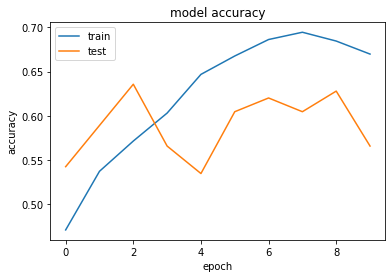

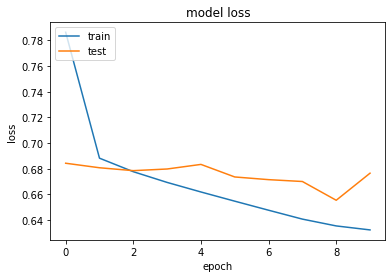

In [10]:
plot_losses(history)

The model seems well fitted since epoch 7

In [11]:
preds = model.predict(X_valid)
y_pred = np.array([np.argmax(x) for x in preds])
y_true = np.array([np.argmax(x) for x in y_valid])
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.80      0.63        59
           2       0.68      0.37      0.48        70

    accuracy                           0.57       129
   macro avg       0.60      0.58      0.55       129
weighted avg       0.61      0.57      0.55       129



In [13]:
print('Number of training observations: ', train_size)

Number of training observations:  257


Results are pretty bad because of the very low number of training observations

In [21]:
confusion_matrix(y_true, y_pred, labels=[0, 2])

array([[47, 12],
       [44, 26]], dtype=int64)

Many noise particles are classified as being cryptophytes